In [5]:
#all imports required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log2 as log
%matplotlib inline

In [2]:
df_ecommerce = pd.read_csv("E-Commerce Shipping_data.csv", index_col=0)
df_ecommerce

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10997,C,Ship,5,4,242,5,low,F,4,1155,0


In [ ]:
df_ecommerce.info()

In [ ]:
df_ecommerce.columns

Data Explorations:

Warehouse Block:

In [ ]:
df_ecommerce['Warehouse_block'].describe()

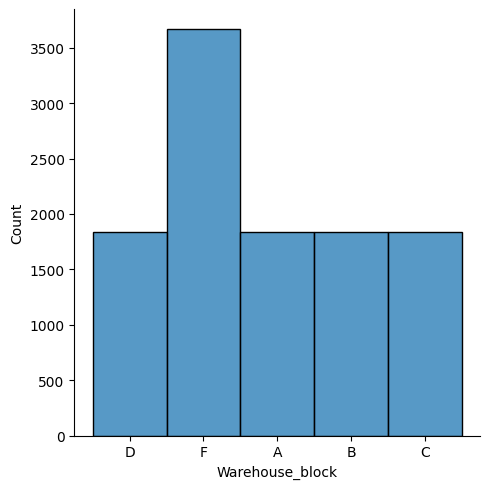

In [3]:
sns.displot(df_ecommerce['Warehouse_block'])

#alle außer F(~3666) kommen gleich oft vor (~1800)

Mode of Shipment:

In [35]:
df_ecommerce['Mode_of_Shipment'].describe()

count     10999
unique        3
top        Ship
freq       7462
Name: Mode_of_Shipment, dtype: object

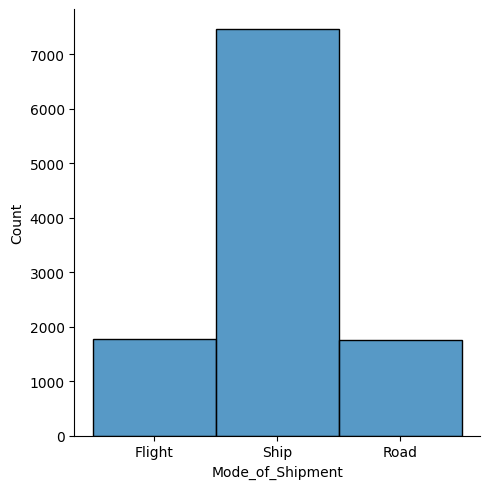

In [36]:
sns.displot(df_ecommerce['Mode_of_Shipment'])

#Ship 7462, Flight und Road beide ~1800

Customer Rating:

In [ ]:
df_ecommerce['Customer_rating'].describe()

#durchschnitt 2.99 mit hoher(?) standartabweichung von 1.4

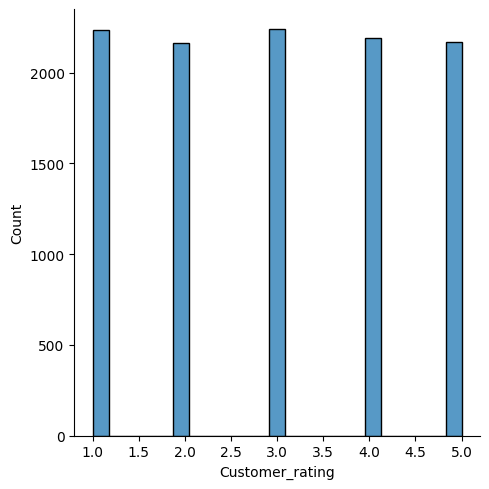

In [38]:
sns.displot(df_ecommerce['Customer_rating'])

#sagt uns garnix

Prior Purchases:

In [ ]:
df_ecommerce['Prior_purchases'].describe()

#durchschnitt 3.57 mit standartabweichung 1.52

In [ ]:
sns.displot(df_ecommerce['Prior_purchases'])

Customer Care Calls:

In [33]:
df_ecommerce['Customer_care_calls'].describe()

# durchschnitt 4.05 mit standartabweichung 1.14

NameError: name 'df_ecommerce' is not defined

In [ ]:
sns.displot(df_ecommerce['Customer_care_calls'])

Cost of Product:

In [ ]:
df_ecommerce['Cost_of_the_Product'].describe()

In [ ]:
sns.displot(df_ecommerce['Cost_of_the_Product'])

Product Importance:

In [ ]:
df_ecommerce['Product_importance'].describe()

In [ ]:
sns.displot(df_ecommerce['Product_importance'])

#low 5297, medium ~4800, high ~900

Gender:

In [ ]:
df_ecommerce['Gender'].describe()

# Female 5545, Male 5454 also ~50/50

Discount offered: 

In [ ]:
df_ecommerce['Discount_offered'].describe()

In [ ]:
sns.displot(df_ecommerce['Discount_offered'])

#mehrheitlich(75%) weniger als 10%

Weight in gms:

In [ ]:
df_ecommerce['Weight_in_gms'].describe()

In [ ]:
sns.displot(df_ecommerce['Weight_in_gms'])

#viel wiegt unter 2000 und viel zwischen 4000 - 6000

#TODO wie viel genau und Zusammenhänge(?)

Reached on time:

In [ ]:
df_ecommerce['Reached.on.Time_Y.N'].describe()

In [ ]:
df_ontime = pd.read_csv("E-Commerce Shipping_data.csv", usecols=['ID','Reached.on.Time_Y.N'])
df_ontime.groupby(['Reached.on.Time_Y.N']).count()

#4436 sind nicht on time angekommen, 6563 sind es

Korrelation zwischen Customer Rating und Cost of Product:

(-0.5, 214.5, 0.0, 6.0)

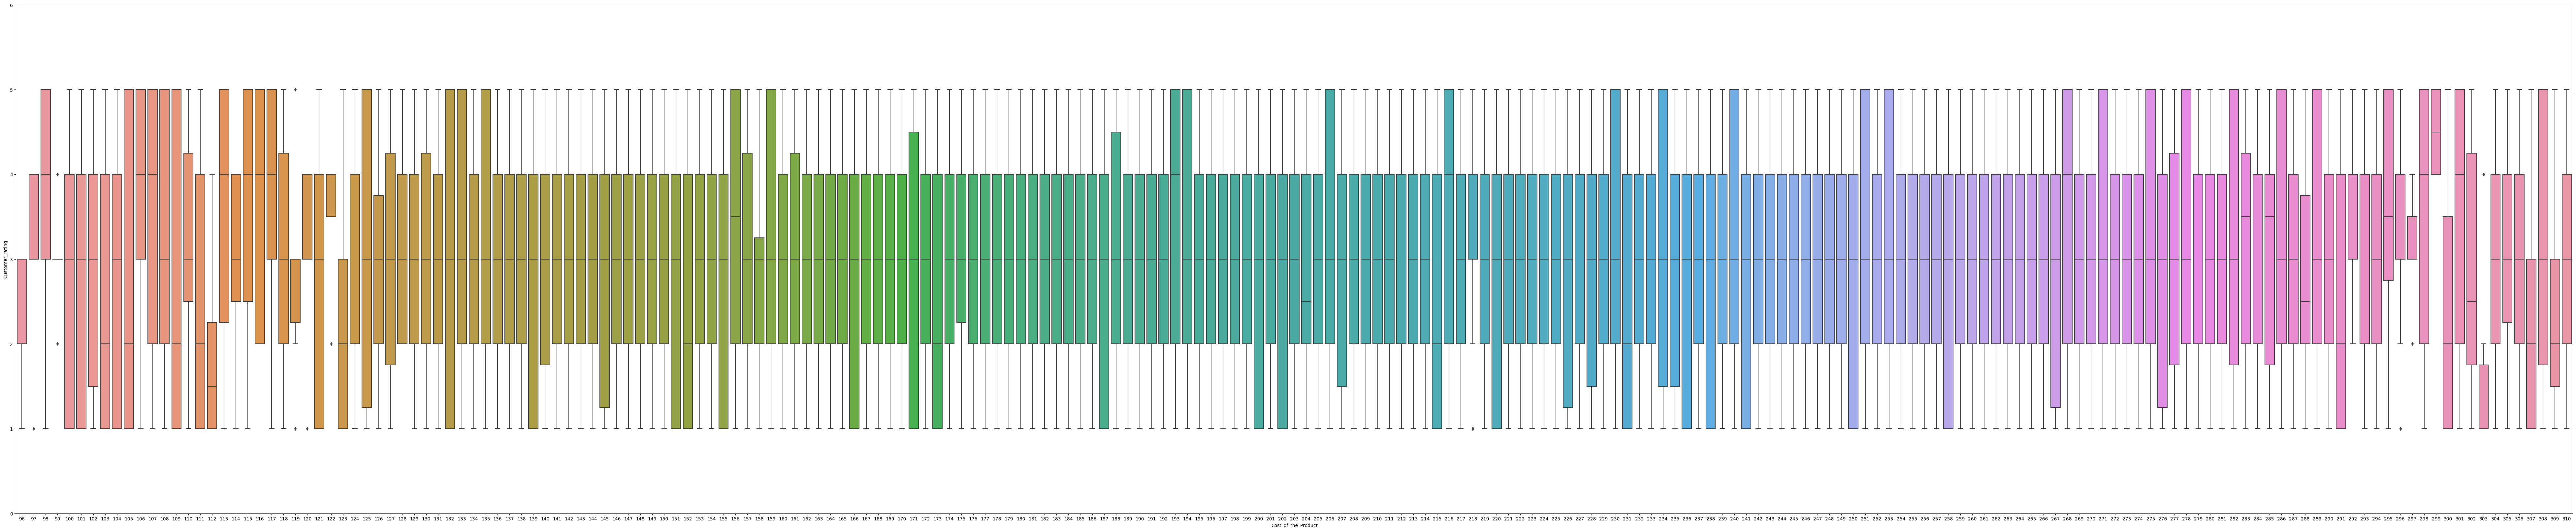

In [37]:
cost = 'Cost_of_the_Product'
rating = 'Customer_rating'
data = pd.concat([df_ecommerce[cost], df_ecommerce[rating]], axis=1)
f, ax = plt.subplots(figsize=(100, 20))
fig = sns.boxplot(x=cost, y=rating, data=data)
fig.axis(ymin=0, ymax=6)

# korreliert nicht

#TODO Nicht-Korrelation besser beweisen/veranschaulichen

Korrelation zwischen Customer Rating und Customer Calls:

In [ ]:
calls = 'Customer_care_calls'
rating = 'Customer_rating'
data = pd.concat([df_ecommerce[calls], df_ecommerce[rating]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=cost, y=rating, data=data)
fig.axis(ymin=0, ymax=6)

#korreliert nicht

Korrelation von Costs:

Data Cleansing:

In [6]:
df = pd.read_csv("E-Commerce Shipping_data.csv", index_col=0)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10997,C,Ship,5,4,242,5,low,F,4,1155,0


In [6]:
df.isnull().sum()

#daten vollständig

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
#TODO vllt manche kategorien rausnehmen weil unwichtig ?
#TODO outlier testen
#TODO testen ob performance verbessert oder nicht?

Data Transformation:

MultiLabelEncoder:

In [2]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #Initalization as shortcut 'le'

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [7]:
df = MultiColumnLabelEncoder(columns= ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']).fit_transform(df)
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,3,0,4,2,177,3,1,0,44,1233,1
2,4,0,4,5,216,2,1,1,59,3088,1
3,0,0,2,2,183,4,1,1,48,3374,1
4,1,0,3,3,176,4,2,1,10,1177,1
5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10995,0,2,4,1,252,5,2,0,1,1538,1
10996,1,2,4,1,232,5,2,0,6,1247,0
10997,2,2,5,4,242,5,1,0,4,1155,0


In [ ]:
# create optimal df for ml methods for reached on time variable
df_reachont = df

df_reachont.drop(['Gender'], axis=1)

Machine Learning:

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 
from sklearn import metrics


Reached in Time:
predict whether the ordered product will be reached on time or not

In [12]:
x = df_reachont.drop(['Reached.on.Time_Y.N'], axis=1)
y = df_reachont['Reached.on.Time_Y.N']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)
x_train.shape, x_test.shape

((7369, 10), (3630, 10))

Logistic Regression:

In [20]:
logreg = LogisticRegression(solver="liblinear", random_state = 42)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [28]:
logreg.coef_

array([[ 0.00146445,  0.00170327, -0.11917119,  0.03933185, -0.00199916,
        -0.07739301, -0.07844085,  0.01203105,  0.11235758, -0.00022761]])

In [29]:
logreg.intercept_

array([1.41663002])

In [ ]:
np.set_printoptions(threshold=np.inf)
logreg.predict(x)

In [21]:
y_pred_test = logreg.predict(x_test)
y_pred_test

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [26]:
print(accuracy_score(y_test, y_pred_test))


0.6366391184573003


In [27]:
y_pred_train = logreg.predict(x_train)
y_pred_train

print(accuracy_score(y_train, y_pred_train))

0.645270728728457


Polynomial Regression:

KNN:

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [16]:
print(accuracy_score(y_test, y_pred))

0.6537190082644628


In [17]:
y_pred_train_knn = knn.predict(x_train)
y_pred_train_knn

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [18]:
print(accuracy_score(y_train, y_pred_train_knn))

0.8246709187135296


In [21]:
neighbors = np.arange(1,40)

test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

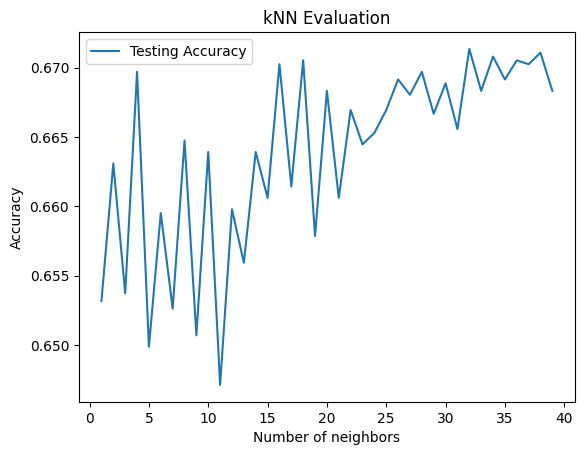

In [22]:
plt.title("kNN Evaluation")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy", )
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

Decision Tree:

In [26]:
dt_gini = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [27]:
y_pred_test_gini = dt_gini.predict(x_test)
y_pred_test_gini

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [28]:
print(accuracy_score(y_test, y_pred_test_gini))

0.6754820936639119


In [29]:
y_pred_train_gini = dt_gini.predict(x_train)

print(accuracy_score(y_train, y_pred_train_gini))

0.6782467091871353


In [31]:
print(classification_report(y_test, y_pred_test_gini))

              precision    recall  f1-score   support

           0       0.55      0.96      0.70      1446
           1       0.94      0.49      0.64      2184

    accuracy                           0.68      3630
   macro avg       0.75      0.72      0.67      3630
weighted avg       0.79      0.68      0.67      3630



In [34]:
#does cross validation for 10 folds

kf = KFold(n_splits=10, shuffle=True, random_state=42)

score = cross_val_score(tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42),
                        x, y, cv=kf, scoring="accuracy")
print(f'Accuracy scores for each fold: {score}')

Accuracy scores for each fold: [0.66363636 0.69181818 0.66181818 0.68363636 0.68363636 0.67727273
 0.65363636 0.66636364 0.69636364 0.68061874]


In [36]:
#checks depth of tree 1-11 for average over 10 folds

max_depth = range(1, 12)

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=val, min_samples_split=2, min_samples_leaf=1, random_state=42),
                        x, y, cv=kf, scoring="accuracy")
    print(f'Average accuracy score({val}): {"{:.3f}".format(score.mean())}')

Average accuracy score(1): 0.644
Average accuracy score(2): 0.671
Average accuracy score(3): 0.676
Average accuracy score(4): 0.680
Average accuracy score(5): 0.682
Average accuracy score(6): 0.680
Average accuracy score(7): 0.677
Average accuracy score(8): 0.675
Average accuracy score(9): 0.671
Average accuracy score(10): 0.667
Average accuracy score(11): 0.670


In [37]:
#decision tree and accuracy for tree without pruning

dt_noparam = DecisionTreeClassifier(criterion="gini", splitter="best", random_state=42)
dt_noparam.fit(x_train, y_train)

y_pred = dt_noparam.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.6473829201101928


In [39]:
#checks best params for max_depth, min_leafs and min_splits

params = {'max_depth': range(2,13,2), 'min_samples_split': range(2,5), 'min_samples_leaf': range(1,3)}

clf=tree.DecisionTreeClassifier()

gcv=GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(x_train, y_train)
gcv.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

predict the cost of the product for the company